## 1

### (a)

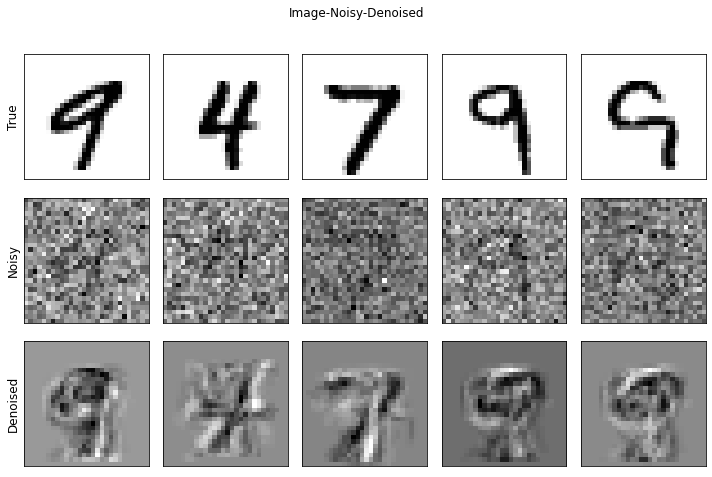

In [1]:
"""
Tools for loading the MNIST Data.

@author: Brett
"""

import numpy as np 
import scipy as sp 
from mnist_tools import * 
from plot_tools import * 

"""
Given a 2-dimensional numpy array trainImages of 
training images with shape (n,d)
(each row is an image), denoise the given noisyImage by orthogonally 
projecting it onto the row space of trainImages.
"""
def denoise(trainImages, noisyImage) :
    A = trainImages 
    b = noisyImage 
    A_use = A @ A.T 
    A_compute = A.T @ np.linalg.inv(A_use) @ A 
    ans = A_compute @ b 
    return ans 

"""
Assumes the data file is in 'mnist_all.mat'.
"""
def main() :
    datafile = "mnist_all.mat" #Change if you put the file in a different path
    train = load_train_data(datafile)
    test,noisyTest,testLabels = load_noisy_test_data(datafile)
    imgs = []
    for i in range(len(testLabels)) :
        trueDigit = testLabels[i]
        testImage = test[i,:]
        noisyImage = noisyTest[i,:]
        denoisedImage = denoise(train[trueDigit],noisyImage)
        imgs.extend([testImage,noisyImage,denoisedImage])
    plot_image_grid(imgs,
                    "Image-Noisy-Denoised",
                    (28,28),len(testLabels),3,True,row_titles=['True','Noisy','Denoised'])

if __name__ == "__main__" :
    main()


### (b)

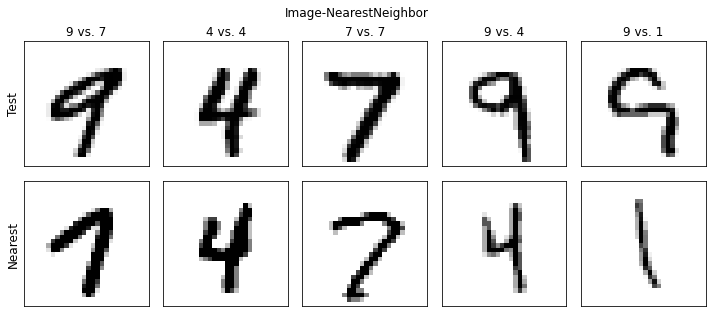

In [2]:
"""
Tools for loading the MNIST Data.

@author: Brett
"""

import numpy as np
from mnist_tools import *
from plot_tools import *

"""
Given train (in the format returned by load_train_data in mnist_tools), 
and a 1d numpy array testImage you should return a tuple (digit,imageIdx).  digit is
an integer giving the numerical digit value of the training image closest 
to the testImage in Euclidean distance.  imageIdx is the row number of the closest 
training image in the 2d array train[digit].
"""
def compute_nearest_neighbors(train, testImage): 
    dist = np.inf 
    for i in range(len(train)): 
        for j in range(100): 
            error = np.array(train[i][j,:]) - np.array(testImage) 
            if dist > np.linalg.norm(error): 
                num = i 
                img = j 
                dist = np.linalg.norm(error) 
    return (num, img) 

"""
Assumes the data file is in 'mnist_all.mat'.
"""
def main() :
    datafile = "mnist_all.mat" #Change if you put the file in a different path
    train = load_train_data(datafile)
    test,testLabels = load_test_data(datafile)
    imgs = []
    estLabels = []
    for i in range(len(testLabels)) :
        trueDigit = testLabels[i]
        testImage = test[i,:]
        (nnDig,nnIdx) = compute_nearest_neighbors(train,testImage)
        imgs.extend( [testImage,train[nnDig][nnIdx,:]] )
        estLabels.append(nnDig)

    row_titles = ['Test','Nearest']
    col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,estLabels)]
    plot_image_grid(imgs,
                    "Image-NearestNeighbor",
                    (28,28),len(testLabels),2,True,row_titles=row_titles,col_titles=col_titles)

if __name__ == "__main__" :
    main() 


### (C) Code in the file "pc_nearest_neighbors.py"

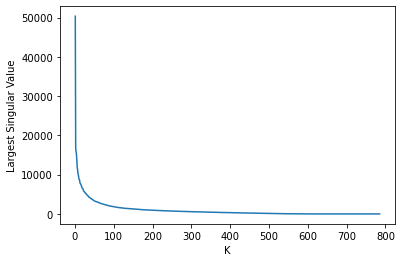

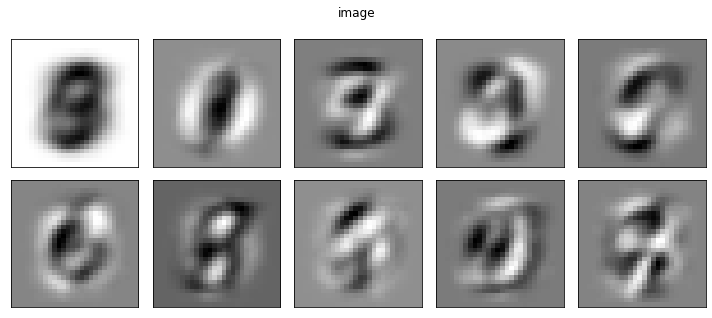

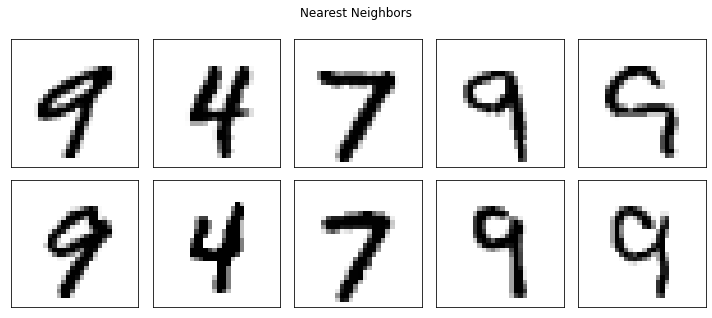

In [5]:
from mnist_tools import *
from plot_tools import *
import matplotlib.pyplot as plt

data = "mnist_all.mat"
trained_data = load_train_data(data)
test,test_label = load_test_data(data)
array = np.asarray(trained_data)
array = np.reshape(array, (array.shape[0] * array.shape[1], -1))
u, sigma, v_t = np.linalg.svd(array) 

# (i) 
plt.plot(np.linspace(1,len(sigma)+1,len(sigma)), sigma) 
plt.xlabel('K') 
plt.ylabel('Largest Singular Value') 
plt.show() 

# (ii)
plot_image_grid(v_t[0: 10], 'image')

# (iii)
k = 7 
first_k = v_t[0:k] 
trained_p = array @ first_k.T 
test_p = test @ first_k.T 
images = [] 
for i in range(len(test_p)): 
    dist = np.inf 
    index = 0 
    for j in range(len(trained_p)): 
        error = test_p[i] - trained_p[j] 
        if dist > np.linalg.norm(error): 
            index = j 
            dist = np.linalg.norm(error) 
    images.extend([test[i], trained_data[index // 100][index % 100, :]]) 
plot_image_grid(images, "Nearest Neighbors", (28,28), len(test_label), 2, True) 